In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2

In [2]:
#http://blog.ayoungprogrammer.com/2013/04/tutorial-detecting-multiple-rectangles.html/
img_dir = [y for x in os.walk('../NetData/Set3') for y in glob(os.path.join(x[0], '*.png'))]

In [3]:
# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
img_idx = 150
img = cv2.imread(img_dir[img_idx])


# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)
thresh_not = cv2.bitwise_not(thresh)

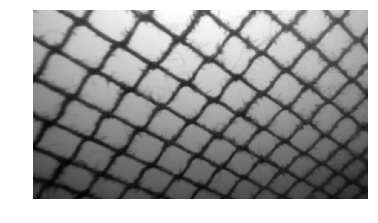

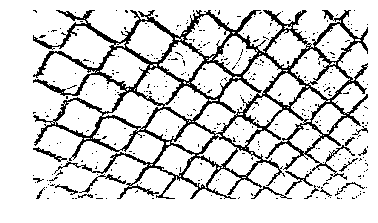

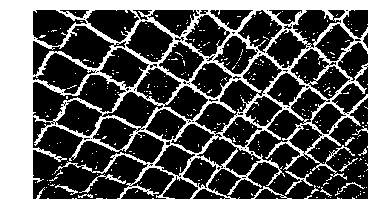

In [4]:
plt.axis("off")
plt.imshow(blurred, cmap='gray')
plt.show()

plt.axis("off")
plt.imshow(thresh, cmap='gray')
plt.show()

plt.axis("off")
plt.imshow(thresh_not, cmap='gray')
plt.show()

In [200]:
linesP = cv2.HoughLinesP(thresh_not, 1, np.pi/180, 400, 500, 1)

In [201]:
img_show = img.copy()

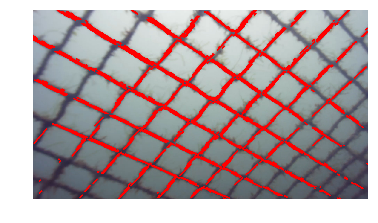

In [202]:
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(img_show, (l[0], l[[1]]), (l[2], l[3]), (0,0,255), 3,
                cv2.LINE_AA)
        
plt.axis("off")
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [205]:
def ComputeIntersect(a, b):
    x1 = a[0]
    y1 = a[1]
    x2 = a[2]
    y2 = a[3]
    
    x3 = b[0]
    y3 = b[1]
    x4 = b[2]
    y4 = b[3]
    
    d = ((x1-x2) * (y3-y4)) - ((y1-y2) * (x3-x4))
    
    th = 10
    
    if d:
        ptx = ((x1*y2 - y1*x2) * (x3-x4) - (x1-x2) * (x3*y4 - y3*x4)) / d
        pty = ((x1*y2 - y1*x2) * (y3-y4) - (y1-y2) * (x3*y4 - y3*x4)) / d
    
    
        if((ptx < min(x1,x2) - th) or (ptx > max(x1,x2) + th) or (pty < min(y1,y2) - th) or (pty > max(y1,y2) + th)):
            return [-1, -1]

        if((ptx < min(x3,x4) - th) or (ptx > max(x3,x4) + th) or (pty < min(y3,y4) - th) or (pty > max(y3,y4) + th)):
            return [-1, -1]

        return [ptx, pty]

    
    else:
        return [-1, -1]
    